In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import torchvision.models as models
from torch.optim import Adam
from torch.nn import BCELoss
import torch

# Libraries are one level up within the components folder
import sys
sys.path.append('../components/')

from dataset_split import DatasetSplit
from model_utils import ModelUtils
from runner import Runner

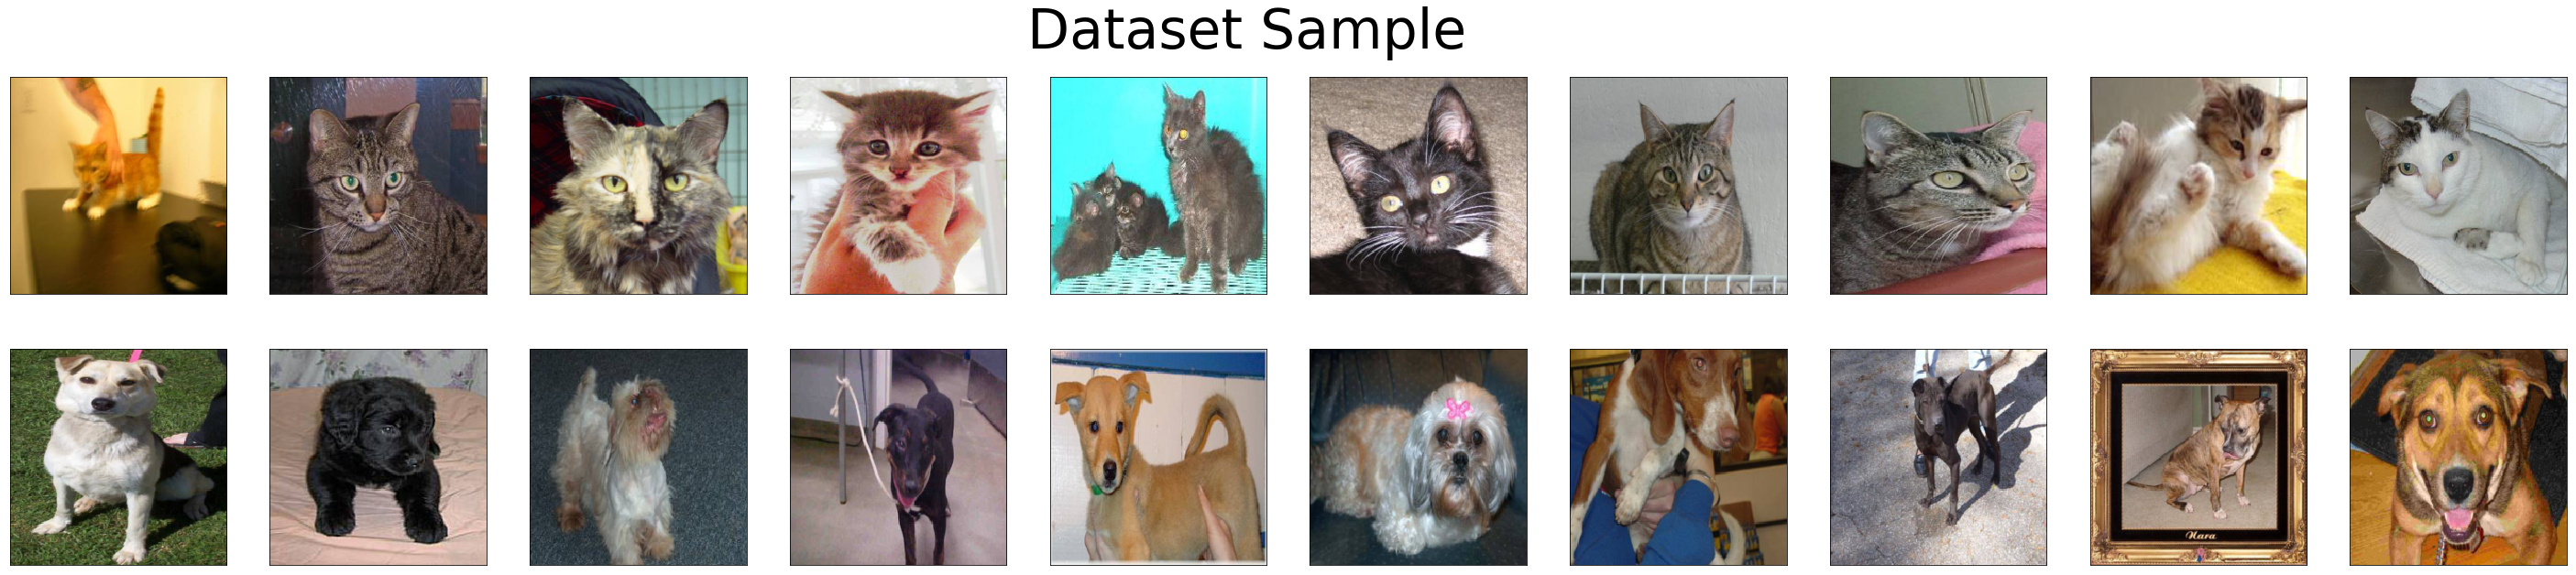

In [2]:
dataset_split = DatasetSplit('../data/dogs_and_cats_small/')
dataloaders = dataset_split.get_dataloaders()
dataset_split.display_sample()

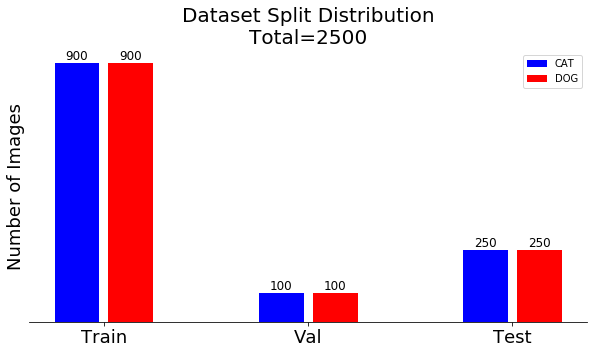

In [3]:
dataset_split.display_distribution()

In [4]:
model = models.vgg11()
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

In [5]:
model.classifier = ModelUtils.get_binary_classifier()
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=128, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=128, out_features=1, bias=True)
  (7): Sigmoid()
)

In [6]:
optimizer = Adam(model.parameters(), lr=0.00001)
loss = BCELoss()
traditional_runner = Runner(dataloaders, model, loss, optimizer)

In [7]:
traditional_runner.run()

Predictions: 100%|██████████| 32/32 [00:02<00:00, 14.49it/s, acc avg=73.8]


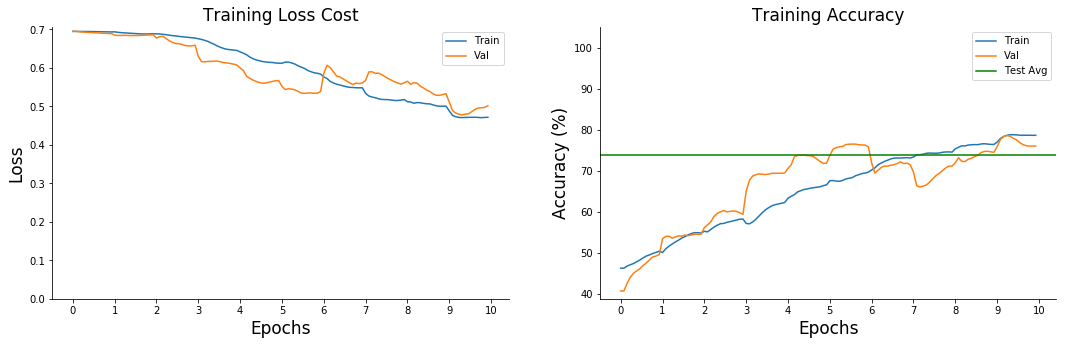

In [8]:
traditional_runner.display_result()

In [9]:
traditional_runner.save_result('small_traditional_result.pth')

In [10]:
model = models.vgg11(pretrained=True)
model.classifier = ModelUtils.get_binary_classifier()

In [11]:
ModelUtils.freeze(model)
ModelUtils.unfreeze(model.classifier)

In [12]:
optimizer = Adam(model.parameters())
loss = BCELoss()
transfer_runner = Runner(dataloaders, model, loss, optimizer)

In [13]:
transfer_runner.run()

Predictions: 100%|██████████| 32/32 [00:02<00:00, 14.70it/s, acc avg=97.3]


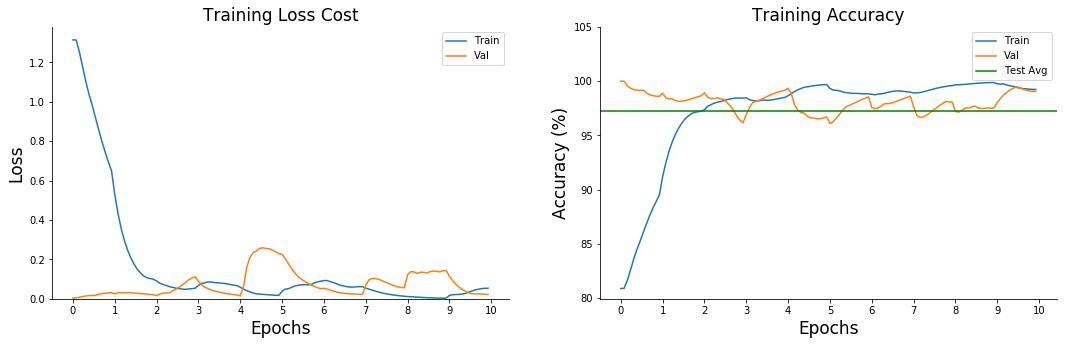

In [14]:
transfer_runner.display_result()

In [15]:
transfer_runner.save_result('small_transfer_result.pth')

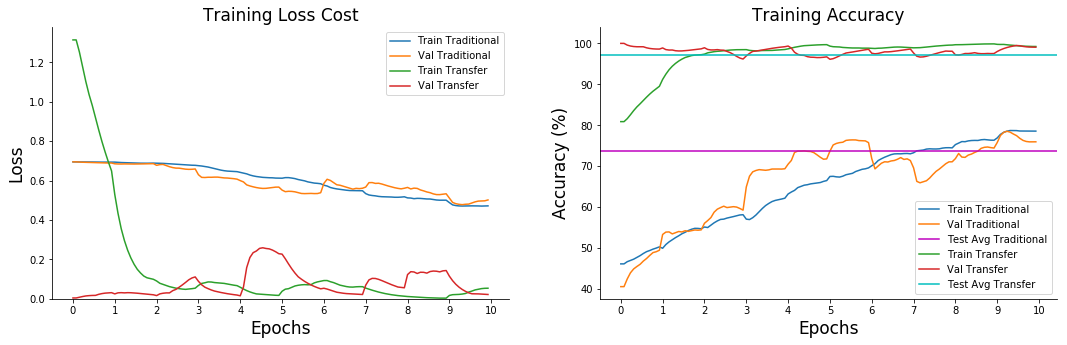

In [16]:
Runner.display_results('./small_traditional_result.pth', './small_transfer_result.pth')

In [17]:
model_knowledge = transfer_runner.model.state_dict()
torch.save(model_knowledge, './best_small_model_state.pth')